<a href="https://colab.research.google.com/github/arriagajorge/Credit-Card-Dataset/blob/main/Fraud_in_Credit_Card_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fraud in Credit Card Dataset

Jorge Vasquez Arriaga

This notebook can be found at [Colab](https://colab.research.google.com/drive/1-LvBomoFgIClA1Nh4eY6PRy-V4SvPIui?usp=sharing).

# Table of contents:

  * <a href=#Load>Load dataset & libraries</a>
  * <a href=#Preprocessing>Pre-processing and visualization</a>
  * <a href=#Question_1>Question 1 </a>
    * <a href=#Histogram>1.1 Plot an histogram of the balance amount for all the customers. </a>
    * <a href=#Structure>1.2 Report any structure you find and any hypotheses you have about that structure. </a>
    * <a href=#Report> 1.3 Report mean and median balance, grouped by year and month of activated_date. </a>
  * <a href=#Question_2>Question 2</a>
    * <a href=#Report_2>2.1 Report in a table the following information for customers who activated their account and
made their last payment during 2020: cust_id (excluding letters), activated_date (in format
YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a
calculated field of cash_advance as a percentage of credit_limit.
  * <a href=#Question_3>Question_3</a>
    * <a href=#Build>3.1 Build a predictive model for fraud. </a>
    * <a href=#Explanation_var>3.2 What explanatory variable was the most powerful predictor for fraud?</a>
  * <a href=#Conclusion>Conclusion</a>

# Load dataset & libraries



In [ ]:
#I uploaded the dataset to a Git-Hub repository in order to be able to load the dataset automatically
!git clone https://github.com/arriagajorge/Credit-Card-Dataset

fatal: destination path 'Credit-Card-Dataset' already exists and is not an empty directory.


In [ ]:
#load libraries

# analysis and manipulation data
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D

# stats
from scipy.stats import weibull_min, expon, lognorm, kstest
import scipy.stats as stats

# manipulation text
import re

# machine learning
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# stats models
import statsmodels.api as sm

First question is in what format the dataset will be loaded, that is, whether it will be a pandas dataframe, a pyspark RDD, or a pyspark dataframe. Since the dataset is not too large, I chose to use a pandas dataframe."

In [ ]:
# Since I'm only working with a dataframe for convenience, I'll refer to it as 'df'
df = pd.read_csv('/content/Credit-Card-Dataset/Stori_Data_Challenge_2021.xls', index_col=0)

The following is the data dictionary extracted from Kaggle:

| Column                   | Description                                                |
|--------------------------|------------------------------------------------------------|
| cust_id                  | Identification of credit card holder (categorical)        |
| activated_date           | Activation date                                           |
| last_payment_date        | Last payment date                                         |
| balance                  | Remaining balance in the account for making purchases     |
| balance_frequency       | Frequency of balance updates, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) |
| purchases               | Amount of purchases made from the account                 |
| oneoff_purchases        | Maximum purchase amount done in one go                   |
| installments_purchases  | Amount of purchases done in installments                 |
| cash_advance            | Cash in advance given by the user                         |
| purchases_frequency     | Frequency of purchases being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| oneoff_purchases_frequency | Frequency of one-off purchases, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| purchases_installments_frequency | Frequency of installment purchases, score between 0 and 1 (1 = frequently done, 0 = not frequently done) |
| cashadvancefrequency     | Frequency of cash advances being paid                    |
| cashadvancetrx           | Number of transactions made with "cash in advance"        |
| purchases_trx            | Number of purchase transactions made                     |
| credit_limit             | Credit card limit for the user                            |
| payments                 | Amount of payment done by the user                        |
| minimum_payments         | Minimum amount of payments made by the user               |
| prcfullpayment           | Percentage of full payment paid by the user               |
| tenure                   | Tenure of credit card service for the user                |
| fraud                    | Fraud                                                      |


# Pre-processing and visualization

In [ ]:
# A first look at the dataframe
print(df.shape)
df.head()

(8950, 21)


,cust_id,activated_date,last_payment_date,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,...,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
1,C10001,2019-10-06,2020-09-09,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,...,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
2,C10002,2019-10-06,2020-07-04,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,...,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
3,C10003,2019-10-06,2020-09-17,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,...,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,C10004,2019-10-06,2020-08-24,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,...,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0
5,C10005,2019-10-06,2020-10-20,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,...,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 1 to 8950
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   activated_date                    8937 non-null   object 
 2   last_payment_date                 8941 non-null   object 
 3   balance                           8948 non-null   float64
 4   balance_frequency                 8950 non-null   float64
 5   purchases                         8950 non-null   float64
 6   oneoff_purchases                  8950 non-null   float64
 7   installments_purchases            8950 non-null   float64
 8   cash_advance                      8838 non-null   float64
 9   purchases_frequency               8950 non-null   float64
 10  oneoff_purchases_frequency        8950 non-null   float64
 11  purchases_installments_frequency  8950 non-null   float64
 12  cash_a

In [ ]:
#Check for null values
print(df.isnull().sum())

#Indeed, "cust_id" is an identifier.
df['cust_id'].nunique()

cust_id                               0
activated_date                       13
last_payment_date                     9
balance                               2
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                        112
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    321
prc_full_payment                      0
tenure                                0
fraud                                 0
dtype: int64


8950

* There is a dataset with 20 variables, one ID and 8950 samples. Conformed by two date type variables, and the rest of numerical type.
* The variable $\texttt{minimum_payments}$ is the variable with more missing values, 3.5% of missing data.
* The variables $texttt{activated_date}$, $texttt{last_payment_date}$, $texttt{balance}$, $texttt{cash_advance}$ and $texttt{credit_limit}$ also have missing data.

Although it is known that you have an ID and date type variables, you have to indicate it to pandas to be able to take advantage of these data types.

In [ ]:
# cust_id as index
df = df.set_index(df.cust_id).drop('cust_id', axis=1)

# Converting the dates to datetime format.
df['activated_date'] = pd.to_datetime(df['activated_date'])
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'])

The next step involves detecting outliers in the data. However, since these are financial data, it is expected that the variables will have quite a few outliers. Nevertheless, it's a good idea to visualize the distribution of the variables and their respective box plots to identify if there are any unusual data points.

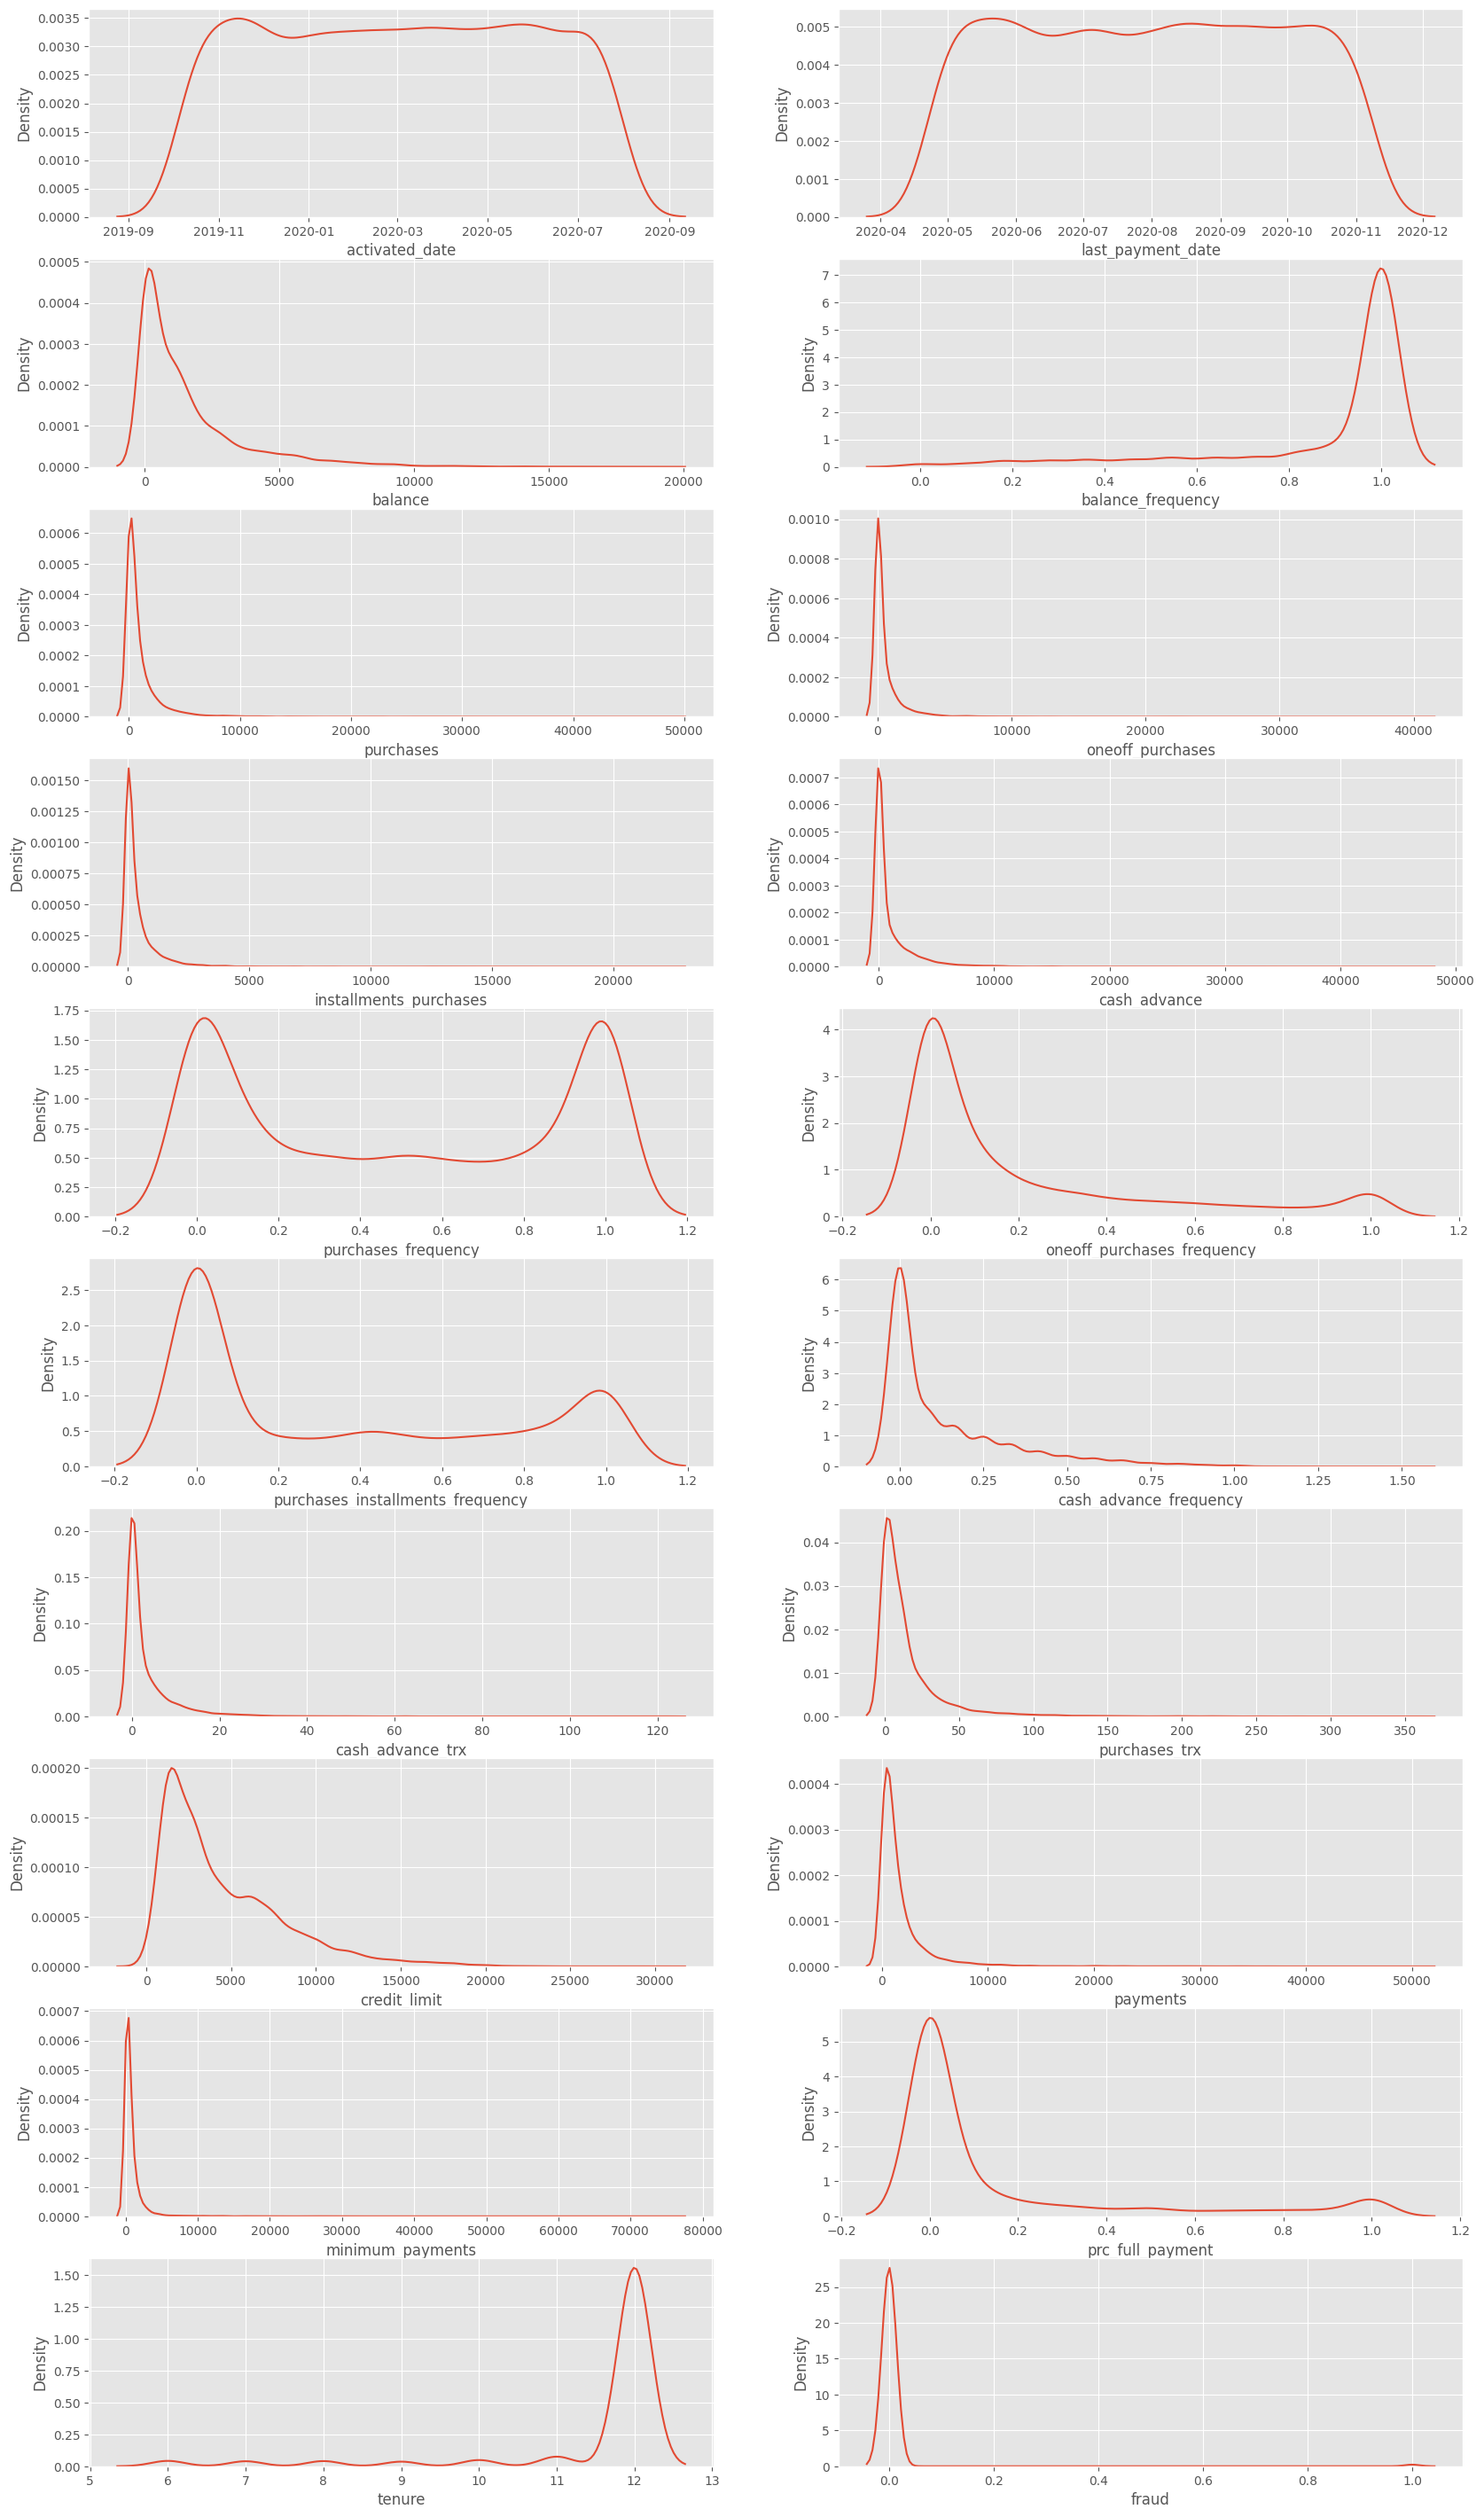

In [ ]:
# Plotting KDE (Kernel Density Estimation) for each variable.
plt.figure(figsize=(20,36))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(10, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

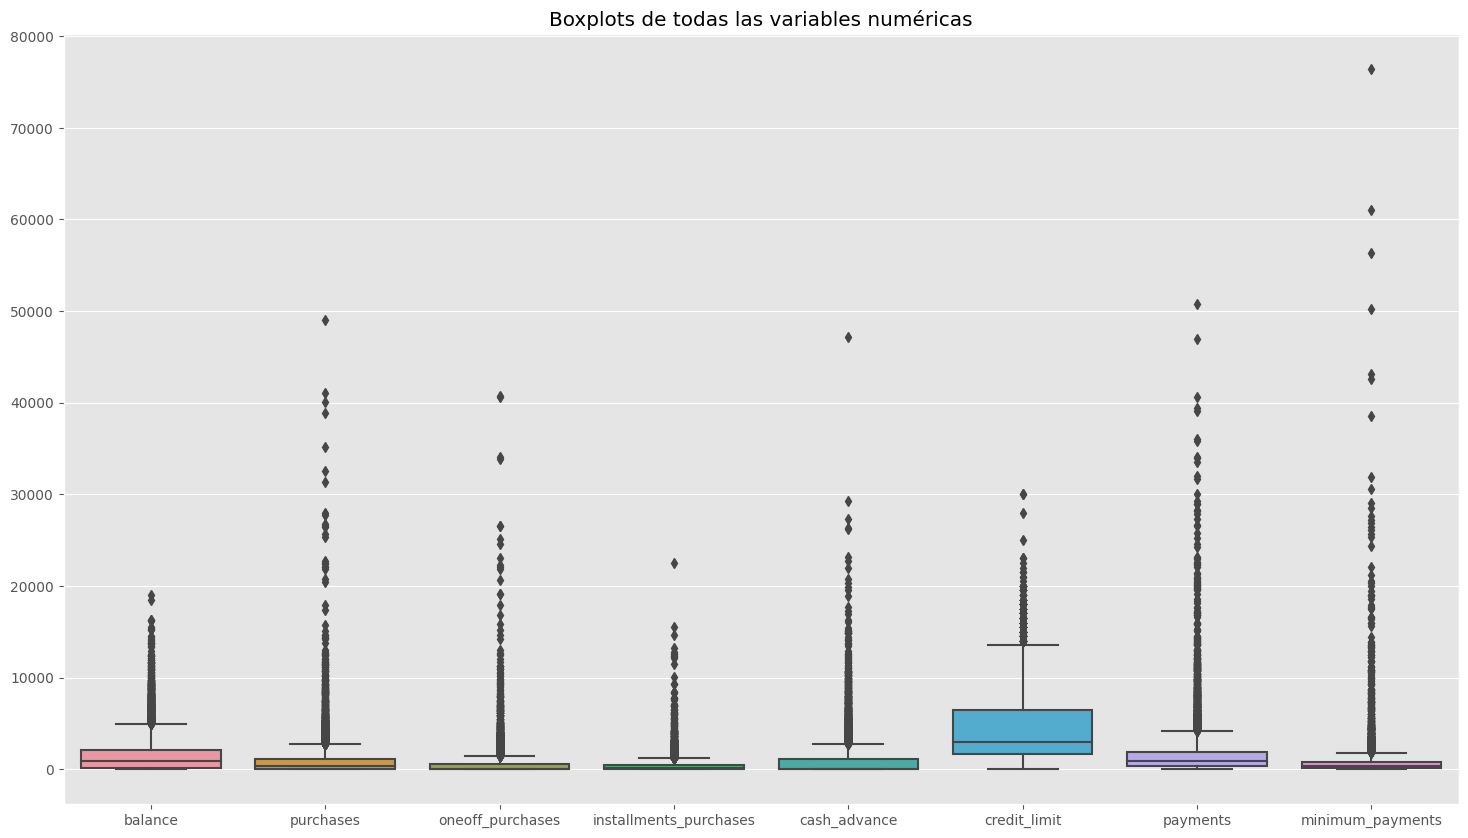

In [ ]:
# Box plots of some numeric variables.
selected_columns = ['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit', 'payments', 'minimum_payments']
plt.figure(figsize=(18, 10))
sns.boxplot(data=df[selected_columns])
plt.title('Boxplots de todas las variables numéricas')
plt.show()

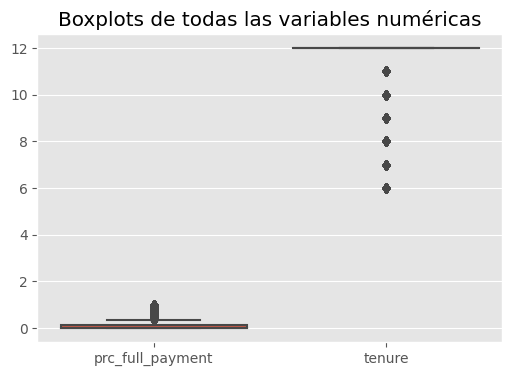

In [ ]:
# Box plots of some numeric variables.
selected_columns = ['prc_full_payment', 'tenure']
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[selected_columns])
plt.title('Boxplots de todas las variables numéricas')
plt.show()

As expected, the variables have heavy tails. It is decided to keep the data as is. Although these variables exhibit skewness. A logarithmic transformation will likely be applied later to reduce the skewness.

The next step involves imputing or removing missing data. To do this, it's necessary to know the objective. In this project, a predictive fraud model will be constructed. For now, no data imputation will be performed, a task that will be carried out when selecting the model. This is because some models can handle missing data, while others require imputation. Additionally, there are less than 5% missing data, so eliminating those data points might not be a bad idea.

In most models, an assumption is the non-linearity of the explanatory variables. A brief correlation analysis will be conducted to see if there are any dependent variables.

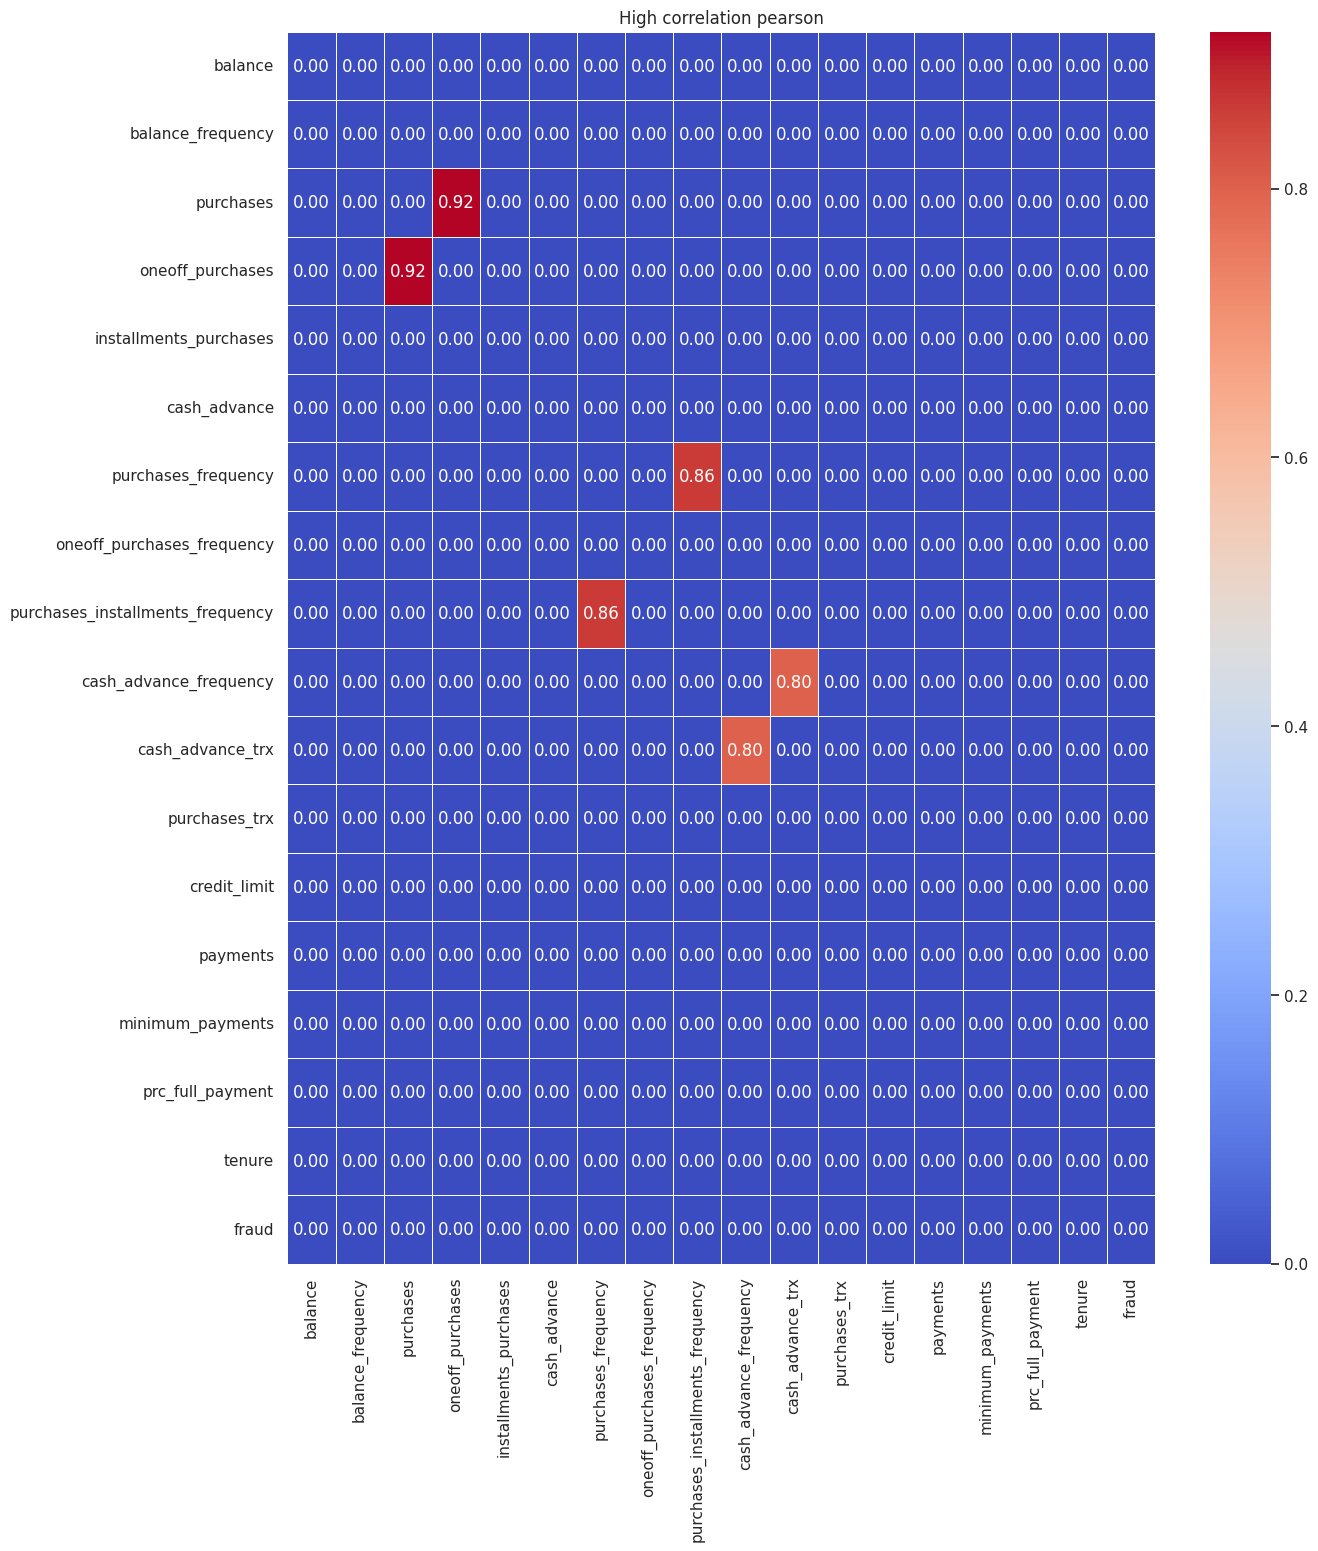

In [ ]:
# correlation matrix
correlation_matrix_pearson = df.corr(method='pearson', numeric_only=True)
correlation_matrix_spearman = df.corr(method='spearman', numeric_only=True)
# high correlation greater than abs(0.7)
high_correlations_pearson = correlation_matrix_pearson[(abs(correlation_matrix_pearson) > 0.7) & (abs(correlation_matrix_pearson) < 1.0)]

# Pearson
# fill nan with 0
high_correlations_pearson = high_correlations_pearson.fillna(0)
# Heat map
sns.set(style="white")
plt.figure(figsize=(14, 16))
sns.heatmap(high_correlations_pearson, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("High correlation pearson")
plt.show()

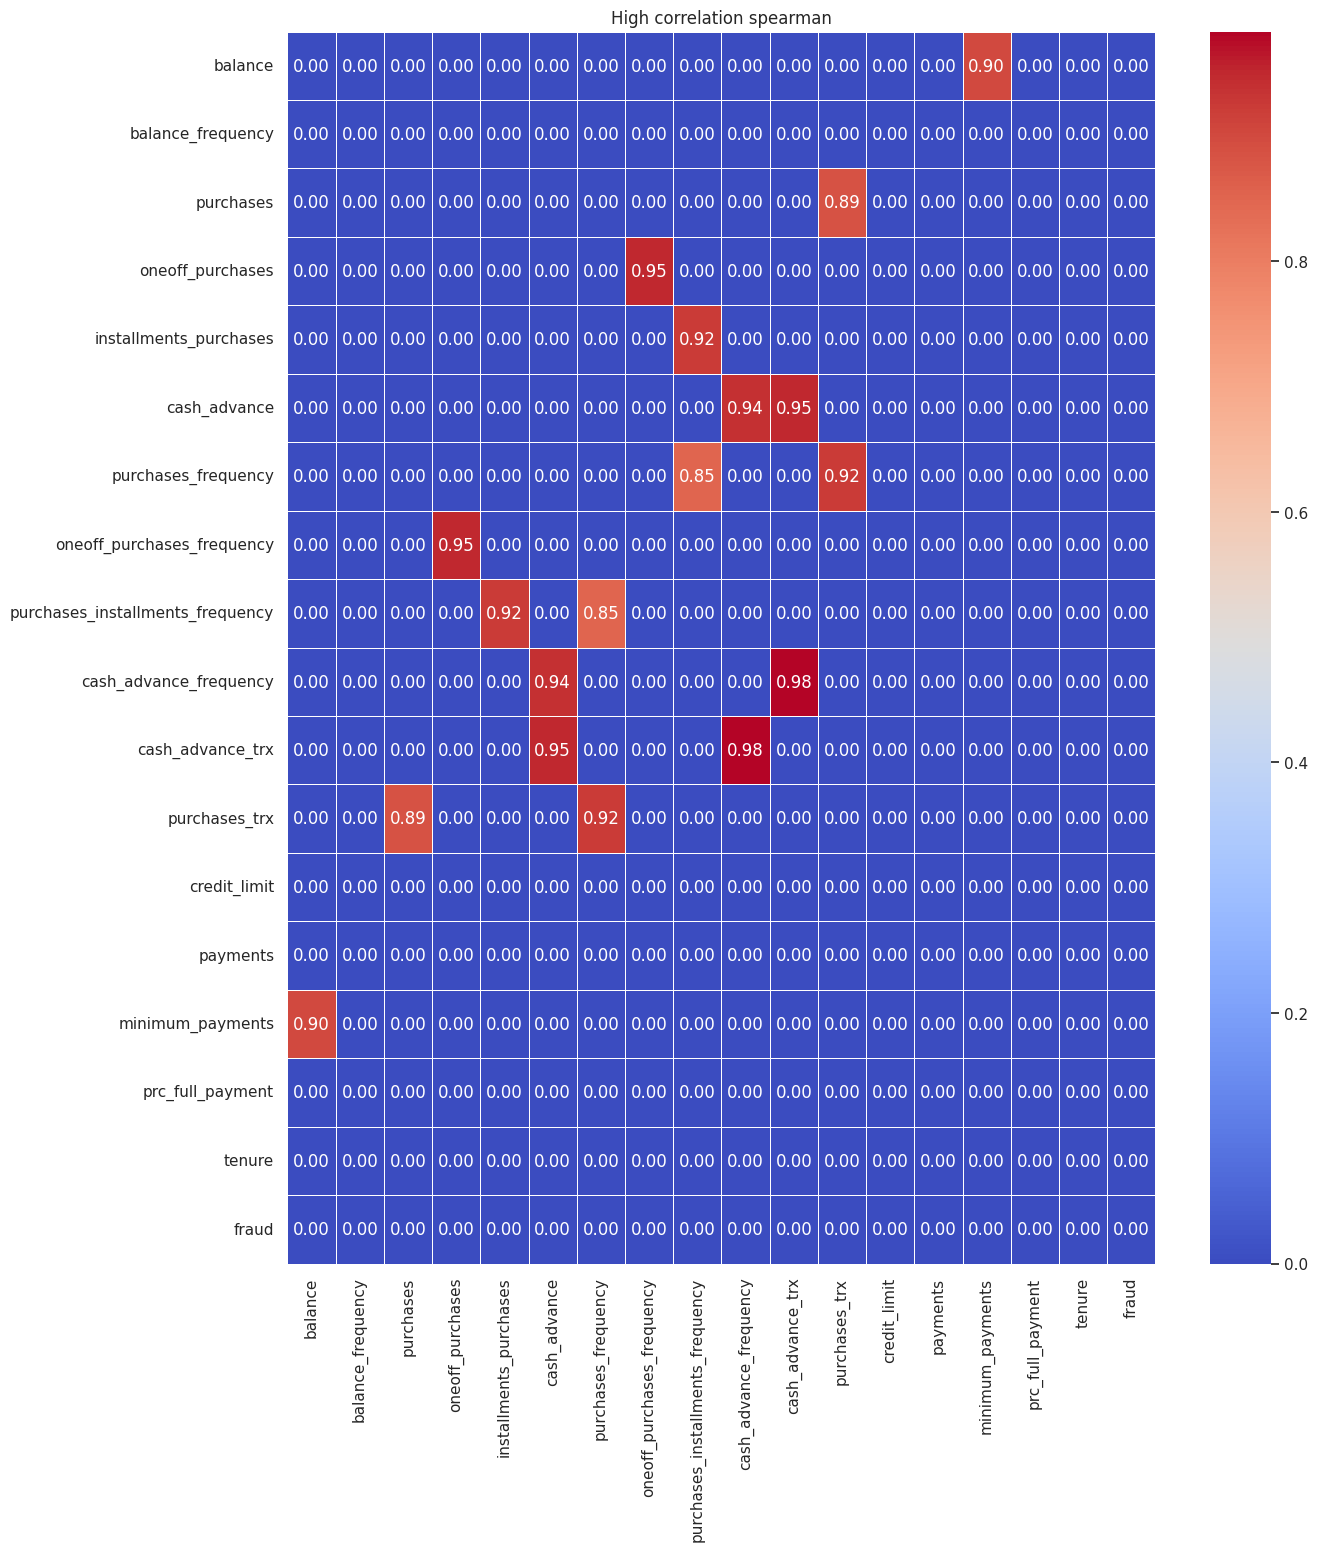

In [ ]:
# high correlation greater than abs(0.7)
high_correlations_spearman = correlation_matrix_spearman[(abs(correlation_matrix_spearman) > 0.85) & (abs(correlation_matrix_spearman) < 1.0)]
# fill nan with 0
high_correlations_spearman = high_correlations_spearman.fillna(0)

# Heat map
sns.set(style="white")
plt.figure(figsize=(14, 16))
sns.heatmap(high_correlations_spearman, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("High correlation spearman")
plt.show()

The Pearson method identifies linear correlations, while the Spearman method is capable of identifying non-linear correlations.


In general, it's a dataset where there aren't many linear relationships between variables. This is beneficial for many models, as previously mentioned, a significant assumption is the non-collinearity of variables.

# Question 1

## 1.1 Plot an histogram of the balance amount for all the customers.


The variable $\texttt{balance}$ is numeric and represents the balance amount left in the account to make purchases. In the correlation analysis, it was found that this variable has a non-linear relationship with the variable $\texttt{minimum_payments}$. Below is a scatter plot illustrating this relationship, showing that as the balance increases, minimum payments also increase.

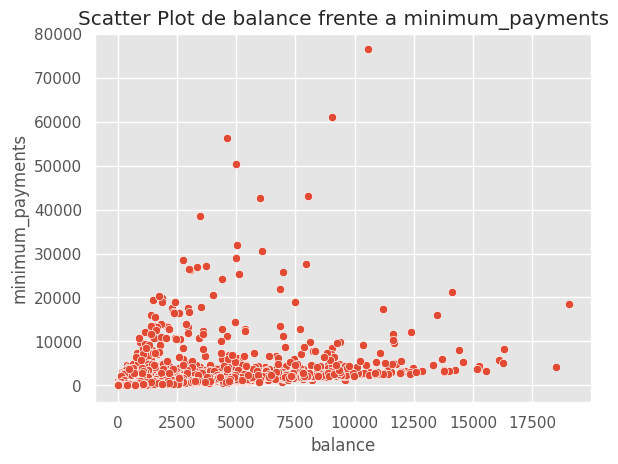

In [ ]:
plt.style.use('ggplot')
sns.scatterplot(data=df, x='balance', y='minimum_payments')
plt.title('Scatter Plot de balance frente a minimum_payments')
plt.show()

In the following figure, the histogram of the variable $\texttt{balance}$ is shown. As initial impressions, one can hypothesize whether the variable follows an exponential or lognormal distribution.

Text(0.5, 1.0, 'Histogram of balance amount for all customers')

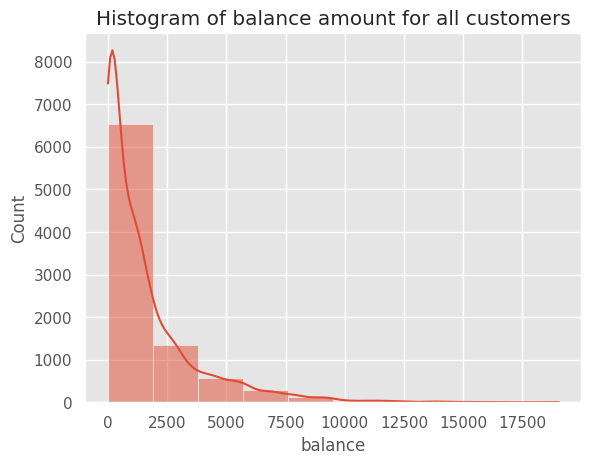

In [ ]:
sns.histplot(data=df, x='balance', bins=10, kde=True)
plt.title('Histogram of balance amount for all customers')

## 1.2 Report any structure you find and any hypotheses you have about that structure.

Based on the previous histogram, an exponential, a lognormal, and a Pareto distribution were fitted using maximum likelihood estimators. The Kolmogorov-Smirnov test revealed that the variable $\texttt{balance}$ did not follow any of these distributions.

If you intend to discover a suitable distribution for this variable, it would be appropriate to explore other heavy-tailed distributions such as Pareto, Zipf, or a mixture of distributions, among others. Finding a distribution that fits this variable is challenging due to the recurring occurrence of zero values.

In [ ]:
# Obtain the variable balance and values greater than zero.
balance = df.balance
balance_greater_zero = balance[balance > 0]

# expontial
params_expon = expon.fit(balance_greater_zero)
ks_stat, ks_p_value = kstest(balance_greater_zero, 'expon', args=params_expon)
print("KS-test expontial p value:", ks_p_value)

# params lognorm
params_lognorm = lognorm.fit(balance_greater_zero)
ks_stat, ks_p_value = kstest(balance_greater_zero, 'lognorm', args=params_lognorm)
print("KS-test lognormal p value:", ks_p_value)

#params weibull
params_weibull = weibull_min.fit(balance_greater_zero)
ks_stat, ks_p_value = kstest(balance_greater_zero, 'weibull_min', args=params_weibull)
print("KS-test weibull p value:", ks_p_value)

KS-test expontial p value: 2.941850759531424e-230
KS-test lognormal p value: 2.828719327768091e-109
KS-test weibull p value: 2.3646044978439323e-55


This same hypothesis can be applied to other variables like $\texttt{purchase}$ or $\texttt{credit_limit}$. However, with $\texttt{credit_limit}$, a satisfactory result is not obtained.

In [ ]:
credit_limit = df.credit_limit
credit_limit_greater_zero = credit_limit[credit_limit > 0]

# expontial
params_expon = expon.fit(credit_limit_greater_zero)
ks_stat, ks_p_value = kstest(credit_limit_greater_zero, 'expon', args=params_expon)
print("KS-test expontial p value:", ks_p_value)

# params lognorm
params_lognorm = lognorm.fit(credit_limit_greater_zero)
ks_stat, ks_p_value = kstest(credit_limit_greater_zero, 'lognorm', args=params_lognorm)
print("KS-test lognormal p value:", ks_p_value)

#params weibull
params_weibull = weibull_min.fit(credit_limit_greater_zero)
ks_stat, ks_p_value = kstest(credit_limit_greater_zero, 'weibull_min', args=params_weibull)
print("KS-test weibull p value:", ks_p_value)

KS-test expontial p value: 8.76960239877999e-222
KS-test lognormal p value: 0.0
KS-test weibull p value: 2.7819469220957833e-78


Interestingly, the variable $\texttt{purchases}$ could be modeled with a lognormal distribution, although caution is advised due to the p-value of 0.04.

In [ ]:
#purchases
purchase = df.purchases
purchase_greater_zero = purchase[purchase > 0]

# expontial
params_expon = expon.fit(purchase_greater_zero)
ks_stat, ks_p_value = kstest(purchase_greater_zero, 'expon', args=params_expon)
print("KS-test expontial p value:", ks_p_value)

# params lognorm
params_lognorm = lognorm.fit(purchase_greater_zero)
print("params lognorm", params_lognorm)
ks_stat, ks_p_value = kstest(purchase_greater_zero, 'lognorm', args=params_lognorm)
print("KS-test lognormal p value:", ks_p_value)

#params weibull
params_weibull = weibull_min.fit(purchase_greater_zero)
ks_stat, ks_p_value = kstest(purchase_greater_zero, 'weibull_min', args=params_weibull)
print("KS-test weibull p value:", ks_p_value)

KS-test expontial p value: 3.2062497593856397e-108
params lognorm (1.2941885062716025, -9.15263285853374, 593.3090494063817)
KS-test lognormal p value: 0.04341616985466856
KS-test weibull p value: 2.0014697760195665e-40


Upon reviewing the means and variances, the variable $\texttt{purchases_installments_frequency}$ exhibits equal values for both. This could suggest modeling it with a Poisson distribution. However, due to the nature of the variable, this option is ruled out.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,8948.0,1564.612804,2081.735635,0.000000,128.234272,873.385231,2054.525476,19043.13856
balance_frequency,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
purchases,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
oneoff_purchases,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
installments_purchases,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
cash_advance,8838.0,978.980630,2099.762588,0.000000,0.000000,0.000000,1115.395002,47137.21176
purchases_frequency,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
oneoff_purchases_frequency,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
purchases_installments_frequency,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
cash_advance_frequency,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


The skewness and kurtosis values reinforce what was observed in the box plots, indicating heavy-tailed distributions. This is because most of the variables have skewness greater than zero. Once again, suggesting the possibility of applying a logarithmic transformation.

In [ ]:
# compute skewness and kurtosis
numeric_columns = df.select_dtypes(include='number').columns
for column in numeric_columns:
    skewness = stats.skew(df[column].dropna())
    kurtosis = stats.kurtosis(df[column].dropna())
    #print(f"{column}:  Skewness {skewness:.2f} and kurtosis {kurtosis:.2f}")

| Variable                           | Skewness | Kurtosis  |
|------------------------------------|----------|-----------|
| balance                            | 2.39     | 7.67      |
| balance_frequency                  | -2.02    | 3.09      |
| purchases                          | 8.14     | 111.33    |
| oneoff_purchases                   | 10.04    | 164.10    |
| installments_purchases             | 7.30     | 96.52     |
| cash_advance                       | 5.19     | 53.20     |
| purchases_frequency                | 0.06     | -1.64     |
| oneoff_purchases_frequency         | 1.54     | 1.16      |
| purchases_installments_frequency   | 0.51     | -1.40     |
| cash_advance_frequency             | 1.83     | 3.33      |
| cash_advance_trx                   | 5.72     | 61.61     |
| purchases_trx                      | 4.63     | 34.77     |
| credit_limit                       | 1.52     | 2.83      |
| payments                           | 5.91     | 54.74     |
| minimum_payments                   | 13.62    | 283.60    |
| prc_full_payment                   | 1.94     | 2.43      |
| tenure                             | -2.94    | 7.69      |
| fraud                              | 11.17    | 122.87    |


## 1.3 Report mean and median balance, grouped by year and month of activated_date.

In [ ]:
# consult
res = df.groupby(df['activated_date'].dt.to_period("M")).agg(   #group by month, year
    mean_balance=pd.NamedAgg(column='balance', aggfunc='mean'), #aggreagtion function
    median_balance=pd.NamedAgg(column='balance', aggfunc='median'))
res

,mean_balance,median_balance
activated_date,,
2019-10,2482.234166,1524.409377
2019-11,1848.704323,1082.071173
2019-12,2018.788906,1162.588384
2020-01,1854.535889,1175.749847
2020-02,1747.350977,994.841733
2020-03,1554.973023,828.954823
2020-04,1483.183191,910.141912
2020-05,1214.333732,734.557681
2020-06,939.997996,472.791862


This report can also be generated using SQL with the pandasql library. However, this library is not fully optimized yet, which is why I chose to do it in the previous way.

In [ ]:
"""
!pip install -U pandasql
!pip install SQLAlchemy==1.4.46

from pandasql import sqldf

query = '''
SELECT
    strftime('%Y-%m', activated_date) AS date,
    AVG(balance) AS mean_balance
    --MEDIAN(balance) AS median_balance -- Define this function
    FROM df
    WHERE activated_date is not null and balance is not null
    GROUP BY date'''

sqldf(query, globals())
"""

"\n!pip install -U pandasql\n!pip install SQLAlchemy==1.4.46\n\nfrom pandasql import sqldf\n\nquery = '''\nSELECT\n    strftime('%Y-%m', activated_date) AS date,\n    AVG(balance) AS mean_balance\n    --MEDIAN(balance) AS median_balance -- Define this function\n    FROM df\n    WHERE activated_date is not null and balance is not null\n    GROUP BY date'''\n\nsqldf(query, globals())\n"

# Question 2

## 2.1 Report in a table the following information for customers who activated their account and made their last payment during 2020: cust_id (excluding letters), activated_date (in format YYYY-MM), last_payment_date (in format YYYY-MM-DD), cash_advance, credit_limit, and a calculated field of cash_advance as a percentage of credit_limit.

In [ ]:
# Select the data corresponding to the dates. This way, you work only with the necessary data, optimizing the operations.
report_table = df.loc[(df['activated_date'].dt.year == 2020) & (df['last_payment_date'].dt.year == 2020),
 ['activated_date', 'last_payment_date', 'cash_advance', 'credit_limit']]

# Adjust the requested formats.
report_table.index = [re.sub("[^0-9]", "", idx) for idx in report_table.index]
report_table['activated_date'] = report_table['activated_date'].dt.strftime('%Y-%m')
report_table['cash_advance_percentage'] = report_table['cash_advance'] * 100 / report_table['credit_limit']

#show
report_table

,activated_date,last_payment_date,cash_advance,credit_limit,cash_advance_percentage
12709,2020-01,2020-05-08,2431.292076,8000.0,30.391151
12710,2020-01,2020-05-26,0.000000,2000.0,0.000000
12712,2020-01,2020-10-20,0.000000,3000.0,0.000000
12713,2020-01,2020-08-22,0.000000,9000.0,0.000000
12714,2020-01,2020-04-26,78.763096,1500.0,5.250873
...,...,...,...,...,...
19186,2020-07,2020-11-03,0.000000,1000.0,0.000000
19187,2020-07,2020-09-06,0.000000,1000.0,0.000000
19188,2020-07,2020-06-03,0.000000,1000.0,0.000000
19189,2020-07,2020-07-19,36.558778,500.0,7.311756


Once again, this report can also be created using SQL with the pandasql library. However, for optimization reasons, I chose to proceed with the previous method.

In [ ]:
# Using pandasql
"""
query = '''
SELECT
    strftime('%Y-%m', activated_date) AS formatted_activated_date,
    strftime('%Y-%m-%d', last_payment_date) AS formatted_last_payment_date,
    cash_advance,
    credit_limit,
    (cash_advance * 100 / credit_limit) AS cash_advance_percentage
    -- CAST(REGEXP_REPLACE(cust_id, '[^0-9]', '') AS INTEGER) AS cust_id -- modify ID as index
FROM
    df
WHERE
    strftime('%Y', activated_date) = '2020'
    AND strftime('%Y', last_payment_date) = '2020';
'''
sqldf(query, globals())
"""

"\nquery = '''\nSELECT\n    strftime('%Y-%m', activated_date) AS formatted_activated_date,\n    strftime('%Y-%m-%d', last_payment_date) AS formatted_last_payment_date,\n    cash_advance,\n    credit_limit,\n    (cash_advance * 100 / credit_limit) AS cash_advance_percentage\n    -- CAST(REGEXP_REPLACE(cust_id, '[^0-9]', '') AS INTEGER) AS cust_id -- modify ID as index\nFROM\n    df\nWHERE\n    strftime('%Y', activated_date) = '2020'\n    AND strftime('%Y', last_payment_date) = '2020';\n'''\nsqldf(query, globals())\n"

# Question 3

## 3.1 Build a predictive model for fraud.

The goal is to build a predictive model for fraud and also identify the variable with the most explanatory power. Combining these objectives, I have decided to work with the logistic regression model. This model not only enables prediction but also explains which variables impact fraud. This feature influenced my decision to use this model over others.

In the context of desiring both predictive accuracy and explanatory insights, the logistic regression model emerges as a favorable choice compared to other methods.

Logistic regression coefficients can be interpreted as the effect of each predictor on the log-odds of the outcome. This interpretability facilitates the explanatory aspect of the model, enabling us to ascertain how individual variables contribute to the likelihood of fraud. This level of insight is particularly valuable when investigating the driving factors behind fraudulent activities.

Furthermore, logistic regression handles both categorical and continuous variables seamlessly, making it suitable for encompassing a variety of predictor types that might be present in the dataset.

### Data impute

Since there are missing data and the chosen model doesn't accept null values, data imputation is required.

From the previous data analysis, the variables contain outliers, making mean imputation less suitable. Median is a better choice, however, above analyzing the $\texttt{balance}$ variable, I realized there are non-linear relationships. Additionally, I assume customers exhibit similar behavior. Hence, I opt to use the K-Nearest Neighbors (KNN) method for data imputation.

In [ ]:
# imputation
knn_imputer = KNNImputer(n_neighbors=50)
imputed_data = knn_imputer.fit_transform(df[df.columns[2:]])

# to pandas
imputed_df = pd.DataFrame(imputed_data, columns=df.columns[2:])
imputed_df = imputed_df.set_index(df.index)
imputed_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,fraud
cust_id,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.0
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,501.763100,0.000000,12.0,0.0
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,0.0
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,126.902035,0.000000,6.0,0.0
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,0.0


### Models


A logistic regression model was chosen, so a few models will be explored, and based on their characteristics, a selection will be made.

#### All variables

The first model is one that considers all the variables, with no interactions between them. In this model a high predictive power is expected, however, most probably there are variables that are not statistically significant for the model.

In [ ]:
imputed_df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure', 'fraud'],
      dtype='object')

In [ ]:
# all explanatory variables
vars_model = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']

In [ ]:
# matrix X for model
X = imputed_df[vars_model]
X = sm.add_constant(X)
# response variable
y = imputed_df['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

         Current function value: 0.010894
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 7160
Model:                          Logit   Df Residuals:                     7142
Method:                           MLE   Df Model:                           17
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.7618
Time:                        17:38:15   Log-Likelihood:                -78.003
converged:                      False   LL-Null:                       -327.43
Covariance Type:            nonrobust   LLR p-value:                 3.295e-95
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -8.4403      3.439     -2.454      0.014     -15.180      -1.700

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Acurracy 0.9949720670391061
num_matches 1781


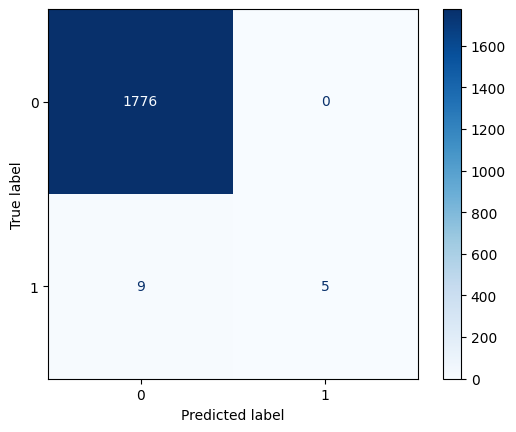

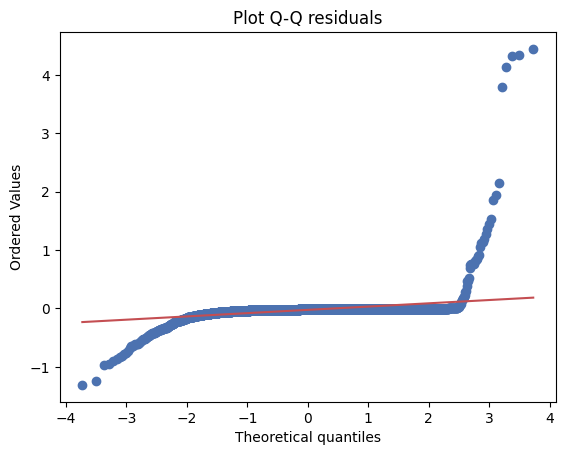

In [ ]:
plt.style.use('default')
# Predicting on test data
y_pred = result.predict(X_test)
# Compute accuracy by comparing y_pred_binary with y_test

y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Acurracy", accuracy)

# Compute the number of matches
num_matches = np.sum(y_pred_binary == y_test)
print("num_matches", num_matches)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)
plt.show()

# Obtaining residuals
residuals = result.resid_dev

# Compute theoretical quantiles
quantiles = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Plot Q-Q residuals')
plt.show()

There is a predictive power of 99%, which is a high value. The confusion matrix shows that it easily predicts when there is no fraud, however, the model has difficulty recognizing when there is fraud. The QQ-plot shows that the residuals do not follow a normal distribution, the problem is in the tails, especially in the right tail, which is to be expected due to the nature of the data. It's important this warning Possibly complete quasi-separation: A fraction 0.23 of observations can be perfectly predicted. There might be overfitting present, which is due to a bias in the response variable. It's necessary to search for a model that reduces this amount.

#### backward selection

In the process of backward selection, we start with the full model and examine the p-value associated with each variable. If the p-value is greater than a predefined threshold (for example, 0.05), the variable is considered not statistically significant. In that case, the variable is removed from the model. Then, the process is repeated with the reduced model, re-evaluating the p-values and eliminating variables that are not statistically significant.

In [ ]:
# Function for performing feature selection based on p-values
def backward_feature_elimination(X, y, significance_level=0.05):
  """
    Performs backward feature elimination using logistic regression.

    This function takes feature matrix X and target vector y and iteratively eliminates
    features from X based on their p-values from logistic regression. The process continues
    until no features with p-values above the specified significance level remain.

    Parameters:
        X (DataFrame): The feature matrix.
        y (Series): The target vector.
        significance_level (float, optional): The significance level for feature elimination.
            Defaults to 0.05.

    Returns:
        DataFrame: The feature matrix with selected features after elimination.
    """
  while len(X.columns) > 0:
      # Fit logistic regression model
      model = sm.Logit(y, X).fit(disp=0)
      # Get p-values
      p_values = model.pvalues
      max_p_value = p_values.max()
      # Eliminate feature if its p-value is above significance level
      if max_p_value > significance_level:
          excluded_feature = p_values.idxmax()
          X = X.drop(excluded_feature, axis=1)
      else:
          break
  return X

In [ ]:
X = imputed_df[vars_model]
X = sm.add_constant(X)

y = imputed_df['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

res = backward_feature_elimination(X_train, y_train, significance_level=0.01)
res.columns

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Index(['const', 'balance', 'purchases', 'cash_advance', 'cash_advance_trx'], dtype='object')

In [ ]:
vars_model = ['balance', 'purchases', 'cash_advance', 'cash_advance_trx']

# matrix X for model
X = imputed_df[vars_model]
X = sm.add_constant(X)
# response variable
y = imputed_df['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# fit model
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.011681
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 7160
Model:                          Logit   Df Residuals:                     7155
Method:                           MLE   Df Model:                            4
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.7446
Time:                        17:38:19   Log-Likelihood:                -83.633
converged:                       True   LL-Null:                       -327.43
Covariance Type:            nonrobust   LLR p-value:                3.224e-104
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.5688      0.678    -14.111      0.000     -10.898      -8.240
balance   

Acurracy 0.9955307262569832
num_matches 1782


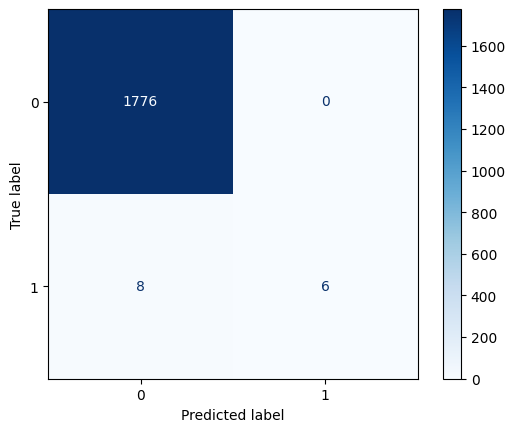

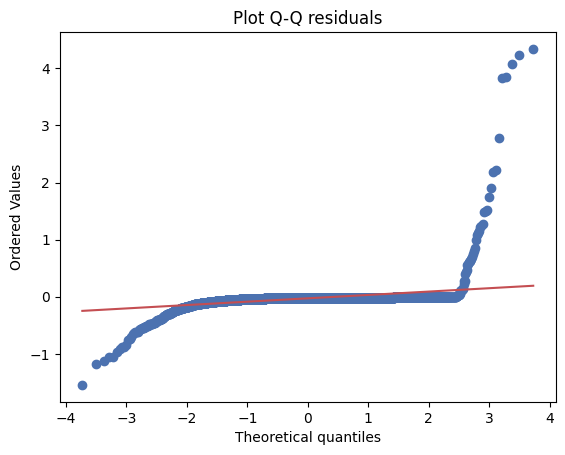

In [ ]:
plt.style.use('default')
# Predicting on test data
y_pred = result.predict(X_test)
# Compute accuracy by comparing y_pred_binary with y_test

y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Acurracy", accuracy)

# Compute the number of matches
num_matches = np.sum(y_pred_binary == y_test)
print("num_matches", num_matches)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)
plt.show()

# Obtaining residuals
residuals = result.resid_dev

# Compute theoretical quantiles
quantiles = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Plot Q-Q residuals')
plt.show()

Although this model has fewer variables, it improves the prediction, which is a good sign. The qq-plot shows that the residuals do not follow a normal distribution, however, this plot improves over the model with all variables. This model has the advantage that all variables are statistically significant.

#### Proposed Model



Since the model does not have an exaggerated number of variables, I proposed a model; from the model with all the variables I discarded variables with a high p-value. This process was completely manual.

In [ ]:
# proposed variables
vars_model = ['balance', 'oneoff_purchases',
       'installments_purchases', 'cash_advance',
              'cash_advance_trx']
#matrix X for model
X = imputed_df[vars_model]
X = sm.add_constant(X)
# response variable
y = imputed_df['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# fit model
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.011478
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 7160
Model:                          Logit   Df Residuals:                     7154
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.7490
Time:                        17:38:21   Log-Likelihood:                -82.185
converged:                       True   LL-Null:                       -327.43
Covariance Type:            nonrobust   LLR p-value:                9.000e-104
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -9.6277      0.694    -13.882      0.000     -10.987     

Acurracy 0.9955307262569832
num_matches 1782


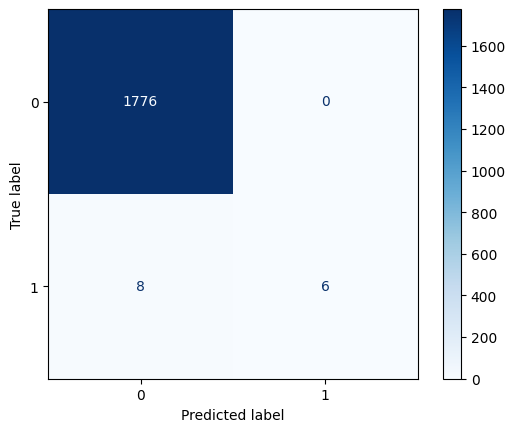

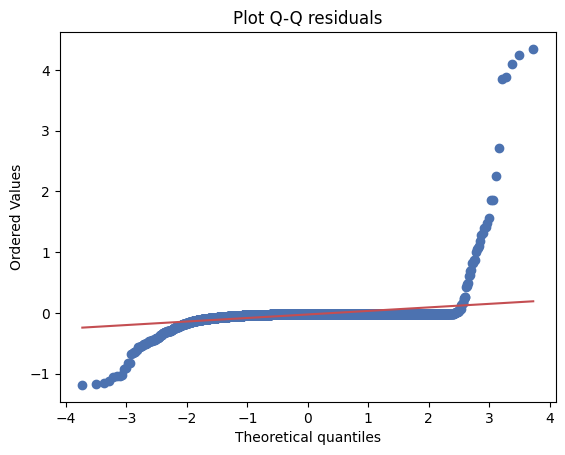

In [ ]:
plt.style.use('default')
# Predicting on test data
y_pred = result.predict(X_test)
# Compute accuracy by comparing y_pred_binary with y_test

y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Acurracy", accuracy)

# Compute the number of matches
num_matches = np.sum(y_pred_binary == y_test)
print("num_matches", num_matches)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)
plt.show()

# Obtaining residuals
residuals = result.resid_dev

# Compute theoretical quantiles
quantiles = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Plot Q-Q residuals')
plt.show()

The proposed model shares many characteristics with the model obtained through backward selection, only the qq-plot is slightly worse, and in the quasi-separation.

#### Transformation Log

In the previous analyses a possible logarithmic transformation was suggested for the skewness variables. So this transformation will be done to later adjust the data using backward selection.

For variables with skewness greater than 1 apply a logarithmic transformation.

In [ ]:
# copy df
imputed_df_transf = imputed_df.copy()

In [ ]:
skewed_cols = ['balance',
       'purchases', 'oneoff_purchases', 'installments_purchases',
       'cash_advance', 'oneoff_purchases_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment']

# apply the logarithmic transformation to the variable
for col in skewed_cols:
    imputed_df_transf[col] = np.log(1 + imputed_df_transf[col])

In [ ]:
# all variables
vars_model = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']
# matrix X for model
X = imputed_df_transf[vars_model]
X = sm.add_constant(X)
# response variable
y = imputed_df_transf['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
# perform backward selection
res = backward_feature_elimination(X_train, y_train, significance_level=0.01)
res.columns

Index(['const', 'balance', 'purchases', 'payments'], dtype='object')

In [ ]:
# selected variables
vars_model = ['balance', 'purchases', 'payments']
# matrix X for model
X = imputed_df_transf[vars_model]
X = sm.add_constant(X)
# response variable
y = imputed_df_transf['fraud']
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# fit model
model = sm.Logit(y_train, X_train)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.019596
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                  fraud   No. Observations:                 7160
Model:                          Logit   Df Residuals:                     7156
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Aug 2023   Pseudo R-squ.:                  0.5715
Time:                        17:38:24   Log-Likelihood:                -140.31
converged:                       True   LL-Null:                       -327.43
Covariance Type:            nonrobust   LLR p-value:                 8.353e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.2447      2.509    -12.454      0.000     -36.162     -26.327
balance        0.9459      0

Acurracy 0.9949720670391061
num_matches 1781


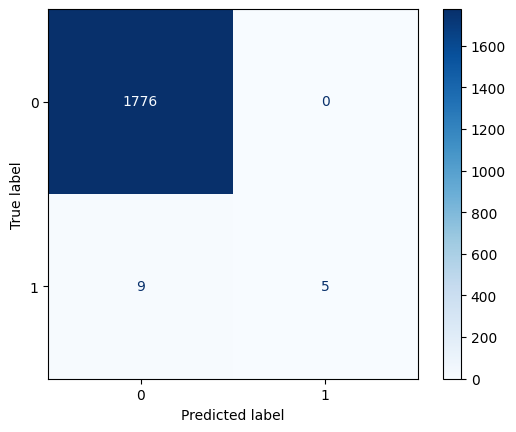

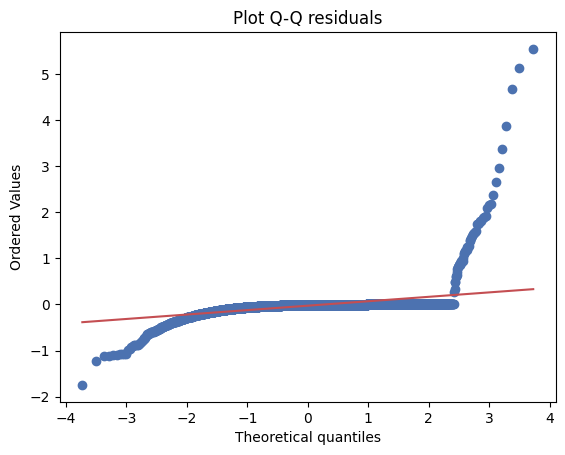

In [ ]:
plt.style.use('default')
# Predicting on test data
y_pred = result.predict(X_test)
# Compute accuracy by comparing y_pred_binary with y_test

y_pred_binary = np.round(y_pred)

accuracy = accuracy_score(y_test, y_pred_binary)
print("Acurracy", accuracy)

# Compute the number of matches
num_matches = np.sum(y_pred_binary == y_test)
print("num_matches", num_matches)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
conf_matrix

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['0', '1'])
fig, ax = plt.subplots()
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.grid(False)
plt.show()

# Obtaining residuals
residuals = result.resid_dev

# Compute theoretical quantiles
quantiles = stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Plot Q-Q residuals')
plt.show()

The model retains the predictive power of the initial model with all variables, despite having fewer. However, the model does not equal the predictive power of the selected model with backward selection.

#### Selected model


Considering the distinct characteristics of each model, the untransformed model using the backward selection approach was chosen. This model exhibited high predictive capability while maintaining simplicity.

In summary, the untransformed model with the backward selection approach was selected due to its strong predictive performance and straightforward nature.

### Dimensionality reduction

Although we will work with the logistic regression model, I think it is a good idea to reduce the dimension of the data to detect some pattern in the data or to suggest another possible model where accuracy is prioritized.

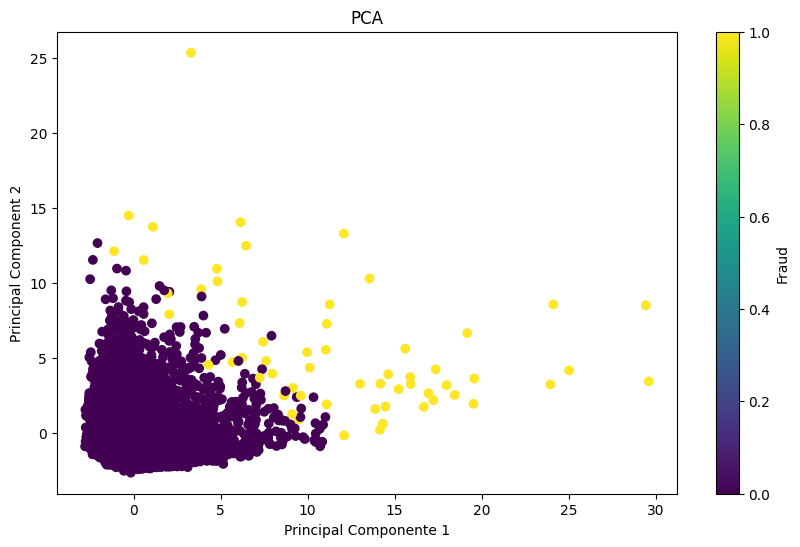

In [ ]:
plt.style.use('default')
# Separate response variable
X = imputed_df.drop('fraud', axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# perform PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Add the principal components to the DataFrame
imputed_df['PC1'] = X_pca[:, 0]
imputed_df['PC2'] = X_pca[:, 1]

# Plot the results by coloring by the variable of interest.
plt.figure(figsize=(10, 6))
plt.scatter(imputed_df['PC1'], imputed_df['PC2'], c=imputed_df['fraud'], cmap='viridis')
plt.xlabel('Principal Componente 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')
plt.colorbar(label='Fraud')
plt.show()

In this PCA analysis, a clear division of the data can be observed. Once the data is transformed using PCA, models like KNN (K-Nearest Neighbors), SVM (Support Vector Machine), or LDA (Linear Discriminant Analysis) can be fitted, potentially enhancing predictive power. However, it's important to note that with such transformations, a significant loss of variable interpretability might occur.

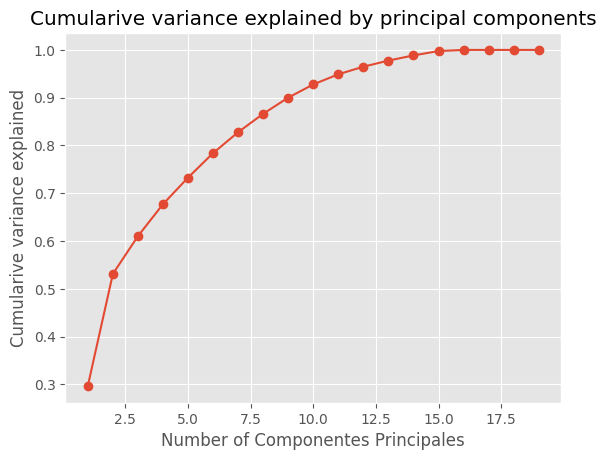

In [ ]:
plt.style.use('ggplot')
# Separate response variable
X = imputed_df.drop('fraud', axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
#for i, ratio in enumerate(explained_variance_ratio, start=1):
    #print(f"Varianza explicada por PC{i}: {ratio:.4f}") #used for markdown table

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Componentes Principales')
plt.ylabel('Cumularive variance explained')
plt.title('Cumularive variance explained by principal components')
plt.show()

The graph suggests using two principal components. Two principal components explain a little more than 53% of the variance.

| Principal Component | Explained variance |
|----------------------|--------------------|
| PC1                  | 0.2969             |
| PC2                  | 0.2345             |
| PC3                  | 0.0789             |
| PC4                  | 0.0669             |
| PC5                  | 0.0556             |
| PC6                  | 0.0513             |
| PC7                  | 0.0437             |
| PC8                  | 0.0385             |
| PC9                  | 0.0339             |
| PC10                 | 0.0276             |
| PC11                 | 0.0212             |
| PC12                 | 0.0159             |
| PC13                 | 0.0128             |
| PC14                 | 0.0109             |
| PC15                 | 0.0091             |
| PC16                 | 0.0024             |
| PC17                 | 0.0000             |
| PC18                 | 0.0000             |
| PC19                 | 0.0000             |


Although it is suggested to work with two principal components, due to the dataset is not very large, it is a good idea to look at a three-dimensional plot.

The figure below shows that it does not make a big difference to use only two components.

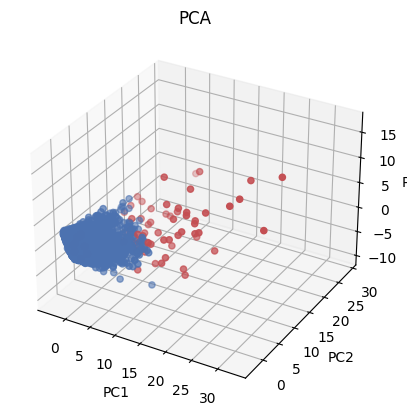

In [ ]:
plt.style.use('default')
# response variable
fraud = imputed_df['fraud']

# Perform PCA with three components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# Figure 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color the points according to the variable "'fraud'.
fraud_colors = ['r' if f == 1 else 'b' for f in fraud]
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=fraud_colors)

# Labels & show
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("PCA")
plt.show()

PCA was also used with the data transformed with the logarithmic function, but here the results were not as good.

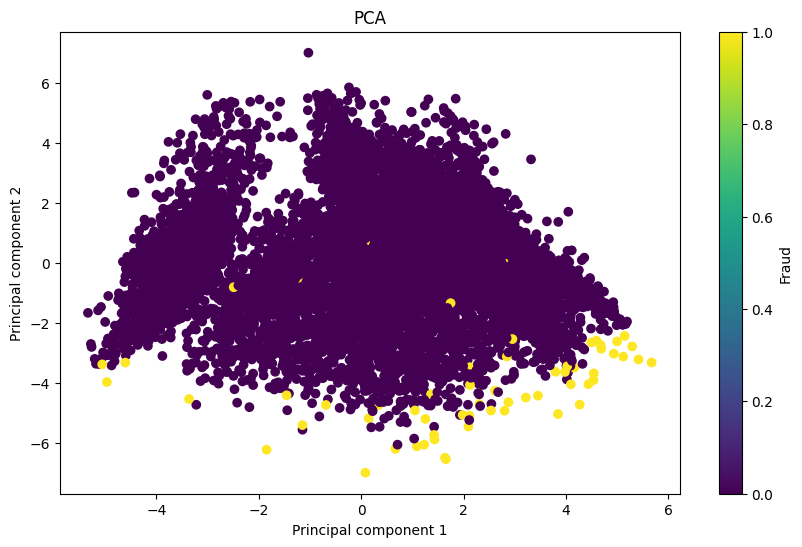

In [ ]:
# Response variable
X = imputed_df_transf.drop('fraud', axis=1)

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # Reducir a 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Add the principal components to the DataFrame
imputed_df_transf['PC1'] = X_pca[:, 0]
imputed_df_transf['PC2'] = X_pca[:, 1]

# Plot the results by coloring by the variable of interest.
plt.figure(figsize=(10, 6))
plt.scatter(imputed_df_transf['PC1'], imputed_df_transf['PC2'], c=imputed_df_transf['fraud'], cmap='viridis')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA')
plt.colorbar(label='Fraud')
plt.show()

I also worked with other dimension reduction methods, but they performed poorly. The code is commented below, it is a bit time consuming and does not add much. However, if you want to see plots go to [reduction t-sne & umap](https://github.com/arriagajorge/Credit-Card-Dataset/tree/main/Images).

In [ ]:
""" time aprox 5min include install libraries
# reduction dimensionaly
pip install umap-learn
import umap
from umap import UMAP
from sklearn.manifold import TSNE



# Separate the response variable
X = imputed_df.drop('fraud', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP
umap_reducer = UMAP(n_neighbors=5, n_components=2)
umap_embedding = umap_reducer.fit_transform(X_scaled)

# Perform t-SNE
tsne_reducer = TSNE(n_components=2, perplexity=30)
tsne_embedding = tsne_reducer.fit_transform(X_scaled)

# Plot the results with color coding based on the target variable
plt.figure(figsize=(12, 6))

# Plot UMAP
plt.subplot(1, 2, 1)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=imputed_df['fraud'], cmap='viridis')
plt.title('UMAP ')

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=imputed_df['fraud'], cmap='viridis')
plt.title('t-SNE')

plt.tight_layout()
plt.show()
"""

" time aprox 5min include install libraries\n# reduction dimensionaly\npip install umap-learn\nimport umap\nfrom umap import UMAP\nfrom sklearn.manifold import TSNE\n\n\n\n# Separate the response variable\nX = imputed_df.drop('fraud', axis=1)\n\n# Standardize the data\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Perform UMAP\numap_reducer = UMAP(n_neighbors=5, n_components=2)\numap_embedding = umap_reducer.fit_transform(X_scaled)\n\n# Perform t-SNE\ntsne_reducer = TSNE(n_components=2, perplexity=30)\ntsne_embedding = tsne_reducer.fit_transform(X_scaled)\n\n# Plot the results with color coding based on the target variable\nplt.figure(figsize=(12, 6))\n\n# Plot UMAP\nplt.subplot(1, 2, 1)\nplt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=imputed_df['fraud'], cmap='viridis')\nplt.title('UMAP ')\n\n# Plot t-SNE\nplt.subplot(1, 2, 2)\nplt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=imputed_df['fraud'], cmap='viridis')\nplt.title('t-SNE')\n\nplt.tight

In [ ]:
""" time aprox 3min
# Separate response varible
X = imputed_df_transf.drop('fraud', axis=1)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform UMAP
umap_reducer = UMAP(n_neighbors=5, n_components=2)
umap_embedding = umap_reducer.fit_transform(X_scaled)

# Perform t-SNE
tsne_reducer = TSNE(n_components=2, perplexity=30)
tsne_embedding = tsne_reducer.fit_transform(X_scaled)

# Plot the results with color coding based on the target variable
plt.figure(figsize=(12, 6))

# Plot UMAP
plt.subplot(1, 2, 1)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=imputed_df_transf['fraud'], cmap='viridis')
plt.title('UMAP (log transformation)')

# Plot t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=imputed_df_transf['fraud'], cmap='viridis')
plt.title('t-SNE (log transformation)')

plt.tight_layout()
plt.show()
"""

" time aprox 3min\n# Separate response varible\nX = imputed_df_transf.drop('fraud', axis=1)\n\n# Standardize the data\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Perform UMAP\numap_reducer = UMAP(n_neighbors=5, n_components=2)\numap_embedding = umap_reducer.fit_transform(X_scaled)\n\n# Perform t-SNE\ntsne_reducer = TSNE(n_components=2, perplexity=30)\ntsne_embedding = tsne_reducer.fit_transform(X_scaled)\n\n# Plot the results with color coding based on the target variable\nplt.figure(figsize=(12, 6))\n\n# Plot UMAP\nplt.subplot(1, 2, 1)\nplt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=imputed_df_transf['fraud'], cmap='viridis')\nplt.title('UMAP (log transformation)')\n\n# Plot t-SNE\nplt.subplot(1, 2, 2)\nplt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=imputed_df_transf['fraud'], cmap='viridis')\nplt.title('t-SNE (log transformation)')\n\nplt.tight_layout()\nplt.show()\n"

## 3.2 What explanatory variable was the most powerful predictor for fraud?

In the selected model, the most important variable, based on the $z$ statistic, is the $\texttt{purchase}$ variable, i.e., it is relevant to know the Amount of purchases made from the account, since it provides a lot of information, as previously mentioned that this variable could be modeled as a lognormal. The intercept has also a great importance, this can be interpreted that by default there is a great possibility of not committing fraud.

|                  | coef     | std err  |     z    | P>(z)   |   [0.025   |   0.975]   |
|------------------|----------|----------|----------|-------|-----------|------------|
| const            | -9.5688  |   0.678  | -14.111  | 0.000 | -10.898   |  -8.240    |
| balance          |  0.0003  | 5.8e-05  |   4.629  | 0.000 |   0.000   |   0.000    |
| purchases        |  0.0006  | 5.59e-05 |  10.591  | 0.000 |   0.000   |   0.001    |
| cash_advance     |  0.0003  | 4.55e-05 |   5.602  | 0.000 |   0.000   |   0.000    |
| cash_advance_trx |  0.0478  |   0.010  |   4.586  | 0.000 |   0.027   |   0.068    |


Likewise, for each variable I fit a logistic regression model that only includes that variable, in order to see if there is a variable that is too relevant on its own.

In this analysis I found that there is no one variable that stands out from the rest.

In [ ]:
def info_per_var_logit(variable):
    """
    Calculate information per variable using logistic regression.

    Args:
        variable (str): Name of the variable to analyze.

    Returns:
        tuple: A tuple containing accuracy, prsquared, and Z-value for the variable.
    """

    # Split the data into training and testing sets
    variable = [variable]
    X = imputed_df[variable]
    X = sm.add_constant(X)
    y = imputed_df['fraud']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

    # Fit the logistic regression model
    model = sm.Logit(y_train, X_train)
    result = model.fit()
    z_values = result.params / result.bse
    z_value_var = z_values[1]  # Z-value for the Variable
    # print(result.summary())

    # Predict on the test data
    y_pred = result.predict(X_test)

    # Calculate accuracy by comparing y_pred_binary with y_test
    y_pred_binary = np.round(y_pred)
    accuracy = accuracy_score(y_test, y_pred_binary)
    return accuracy, result.prsquared, z_value_var

In [ ]:
all_vars = ['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure']

# Used for build table
"""
for variable in all_vars:
  info = info_per_var_logit('balance')
  print(variable, info) #used for table
"""

"\nfor variable in all_vars:\n  info = info_per_var_logit('balance')\n  print(variable, info) #used for table\n"

| Variable                           | Accuracy          | pseudo R-squared          | Z-value           |
|:-----------------------------------|:------------------:|:------------------:|------------------:|
| balance                           | 0.9927           | 0.2094           | 12.7394          |
| balance_frequency                 | 0.9927           | 0.2094           | 12.7394          |
| purchases                         | 0.9927           | 0.2094           | 12.7394          |
| oneoff_purchases                  | 0.9927           | 0.2094           | 12.7394          |
| installments_purchases            | 0.9927           | 0.2094           | 12.7394          |
| cash_advance                      | 0.9927           | 0.2094           | 12.7394          |
| purchases_frequency               | 0.9927           | 0.2094           | 12.7394          |
| oneoff_purchases_frequency        | 0.9927           | 0.2094           | 12.7394          |
| purchases_installments_frequency | 0.9927           | 0.2094           | 12.7394          |
| cash_advance_frequency            | 0.9927           | 0.2094           | 12.7394          |
| cash_advance_trx                  | 0.9927           | 0.2094           | 12.7394          |
| purchases_trx                    | 0.9927           | 0.2094           | 12.7394          |
| credit_limit                      | 0.9927           | 0.2094           | 12.7394          |
| payments                          | 0.9927           | 0.2094           | 12.7394          |
| minimum_payments                  | 0.9927           | 0.2094           | 12.7394          |
| tenure                            | 0.9927           | 0.2094           | 12.7394          |
| prc_full_payment                  | 0.9927           | 0.2094           | 12.7394          |


# Conclusion

A logistic regression model was tailored to predict instances of fraud while also shedding light on the most influential variables. The resulting model demonstrated strong predictive capability for non-fraudulent cases and moderate performance for fraudulent ones. Notably, the $\texttt{purchase}$ variable emerged as significant within the model, indicating its relevance. Moreover, it's worth considering that this $\texttt{purchase}$ variable might potentially follow a lognormal distribution.